# Train Binary Classifier using AutoGluon

AutoGluon은 `fit()` 함수 호출만으로 상당히 높은 정확도의 모델을 생성하며, 최신 기능들을 계속 업데이트되고 있습니다. <br>
본 핸즈온에서는 개인 소득이 $50k를 초과하는지 여부를 예측하는 이진 분류 모델을 AutoGluon으로 훈련해 보겠습니다.

In [1]:
%load_ext autoreload
%autoreload 2
import mxnet
mxnet.__version__

'1.8.0'

## 1. Quick Start

Toy example로 AutoGluon의 저장소에 있는 CSV 데이터셋을 로드하고, 핸즈온을 위해 500건의 데이터만 샘플링합니다.

참고로 TabularDataset은 pandas 데이터프레임과 호환되기 때문에, TabularDataset을 데이터프레임으로 변환하거나 데이터프레임을 TabularDataset로 자유롭게 변환할 수 있습니다.

### Data preparation

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')

subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data = train_data.sample(n=subsample_size, random_state=0)

label = 'class'
print("Summary of |class variable: \n", train_data[label].describe())

y_test = test_data[label]  # values to predict
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating

Summary of |class variable: 
 count        500
unique         2
top        <=50K
freq         365
Name: class, dtype: object


In [3]:
train_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
6118,51,Private,39264,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
23204,58,Private,51662,10th,6,Married-civ-spouse,Other-service,Wife,White,Female,0,0,8,United-States,<=50K
29590,40,Private,326310,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,44,United-States,<=50K
18116,37,Private,222450,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,2339,40,El-Salvador,<=50K
33964,62,Private,109190,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,40,United-States,>50K


### Training

여러분은 단 한 줄의 코드로 쉽게 AutoML을 수행할 수 있습니다.
문제 유형을 지정하지 않아도 자동으로 문제 유형을 파악하며, 별도의 피쳐 인코딩/변환을 수행하지 않아도 되며 결측치 또한 자동으로 처리할 수 있습니다.
이 때, 별도의 검증 데이터셋을 지정하지 않으면, AutoGluon은 데이터의 자동으로 훈련 데이터/검증 데이터를 분리합니다.

AutoGluon은 검증 데이터에서 최고의 성능을 내기 위한 다양한 조합을 반복적으로 수행하며, `fit()`에서 다양한 인수를 지정하여 자유롭게 AutoML을 수행할 수 있습니다.

참고로, Titanic 데이터셋에 아래 설정으로 훈련 수행 시 Kaggle Private LB 기준으로 Top 3%의 accuracy를 보입니다.
(https://www.kaggle.com/innixma/top-3-in-1-line-of-code-w-autogluon)
```python
# Titanic Top 3% accuracy
predictor = TabularPredictor(label=label).fit(train_data, time_limit=3600, num_bag_folds=8)
```

#### Tip 
GPU가 있다면, AutoGluon 0.1부터 LightGBM, CatBoost, XGBoost, NN, FastAI NN 모델 훈련 시 GPU로 훈련이 가능합니다.
```python
predictor = TabularPredictor(..).fit(..., ag_args_fit={'num_gpus': 1})
```

In [4]:
!rm -rf ag-01-binary ag-01-binary-hpo

In [5]:
# time_limit=60 -> 60sec = 1min
save_path = 'ag-01-binary'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, time_limit=60)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "ag-01-binary/"
AutoGluon Version:  0.1.0
Train Data Rows:    500
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' >50K', ' <=50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs negative ( <=50K) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    62767.01 M

Epoch 26: early stopping


	0.84	 = Validation accuracy score
	15.19s	 = Training runtime
	0.12s	 = Validation runtime
Fitting model: LightGBMLarge ... Training model for up to 28.56s of the 28.56s of remaining time.
	0.83	 = Validation accuracy score
	0.43s	 = Training runtime
	0.02s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 59.79s of the 26.92s of remaining time.
	0.86	 = Validation accuracy score
	0.53s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 33.65s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("ag-01-binary/")


### Evaluation

In [6]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  binary
AutoGluon identified the following types of features:
('category', []) : 8 | ['workclass', 'education', 'marital-status', 'occupation', 'relationship', ...]
('int', [])      : 6 | ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', ...]


In [7]:
y_pred = predictor.predict(test_data_nolab)
y_pred.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [8]:
y_prob = predictor.predict_proba(test_data_nolab)
y_prob.head()

,<=50K,>50K
0,0.912903,0.087097
1,0.974550,0.025450
2,0.540779,0.459221
3,0.993179,0.006821
4,0.991103,0.008897


In [9]:
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.8456341488381616
Evaluations on test data:
{
    "accuracy": 0.8456341488381616,
    "accuracy_score": 0.8456341488381616,
    "balanced_accuracy_score": 0.7447092937013047,
    "matthews_corrcoef": 0.5427145487098487,
    "f1_score": 0.8456341488381616
}
Detailed (per-class) classification report:
{
    " <=50K": {
        "precision": 0.8706498690283149,
        "recall": 0.9367870084552409,
        "f1-score": 0.9025084044478925,
        "support": 7451
    },
    " >50K": {
        "precision": 0.7311643835616438,
        "recall": 0.5526315789473685,
        "f1-score": 0.6294840294840296,
        "support": 2318
    },
    "accuracy": 0.8456341488381616,
    "macro avg": {
        "precision": 0.8009071262949794,
        "recall": 0.7447092937013047,
        "f1-score": 0.7659962169659611,
        "support": 9769
    },
    "weighted avg": {
        "precision": 0.8375525862653153,
        "recall": 0.8456341488381616,
        "f1-score": 0.83

ROC 커브, Precision-Recall 커브, Confusion matrix를 확인합니다. 

confusion matrix (cutoff=0.5)
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7451
           1       0.73      0.55      0.63      2318

    accuracy                           0.85      9769
   macro avg       0.80      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



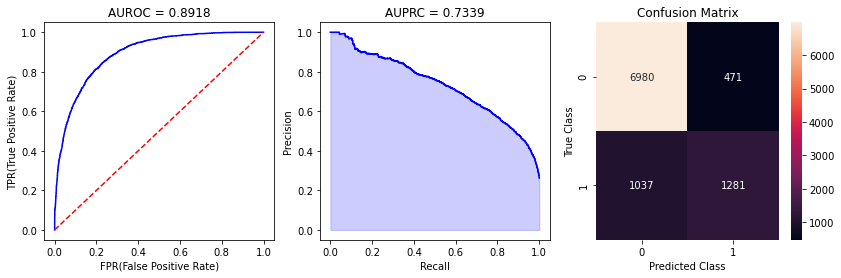

In [10]:
from src.utils import plot_all
y_prob = predictor.predict_proba(test_data_nolab)
y_prob_ = y_prob.iloc[:,-1]
plot_all(y_test, y_prob_)

In [11]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost       0.86       0.010786   1.309227                0.010786           1.309227            1       True          9
1   WeightedEnsemble_L2       0.86       0.011591   1.844003                0.000805           0.534776            2       True         14
2               XGBoost       0.85       0.009755   2.876513                0.009755           2.876513            1       True         10
3              LightGBM       0.85       0.017725   1.233601                0.017725           1.233601            1       True          7
4        ExtraTreesEntr       0.84       0.110103   0.564139                0.110103           0.564139            1       True          4
5      RandomForestGini       0.84       0.110846   0.818314                0.110846           0.818314 

In [12]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.86,0.010786,1.309227,0.010786,1.309227,1,True,9
1,WeightedEnsemble_L2,0.86,0.011591,1.844003,0.000805,0.534776,2,True,14
2,XGBoost,0.85,0.009755,2.876513,0.009755,2.876513,1,True,10
3,LightGBM,0.85,0.017725,1.233601,0.017725,1.233601,1,True,7
4,ExtraTreesEntr,0.84,0.110103,0.564139,0.110103,0.564139,1,True,4
5,RandomForestGini,0.84,0.110846,0.818314,0.110846,0.818314,1,True,1
6,NeuralNetMXNet,0.84,0.118674,6.616637,0.118674,6.616637,1,True,11
7,NeuralNetFastAI,0.84,0.119236,15.189906,0.119236,15.189906,1,True,12
8,LightGBMLarge,0.83,0.017012,0.431329,0.017012,0.431329,1,True,13
9,LightGBMXT,0.83,0.020076,0.193804,0.020076,0.193804,1,True,8


<br>

## 2. Hyperparameter Tuning

`fit()`은 기본적으로 신경망과 다양한 유형의 트리 앙상블 모델을 훈련합니다. 각 모델 유형에 대해 다양한 하이퍼파라메터를 지정할 수 있으며, 각 하이퍼 파라미터에 대해 단일 고정 값을 지정하거나 고려할 하이퍼파라메터의 검색 공간(search space)을 지정할 수 있습니다. 지정하지 않은 하이퍼 파라미터는 AutoGluon에서 자동으로 선택한 기본 설정으로 유지됩니다. 또한, 특정 모델을 훈련 시 제외할 수 있습니다.

아래 코드 셀에서는 NN(Neural Network), GBM(Gradient Boosted Tree), XGB(XGBooost)에 아래의 하이퍼파라메터 조합으로 훈련을 수행하면서
KNN(K-nearest Neighbor), RF(Random Forest)를 제외하는 예시를 보여주고 있습니다.


### Pre-defined presets

AutoGluon은 사전 정의된 6종류의 프리셋을 지원하고 있으며, 각 프리셋 설정에 적합한 하이퍼파라메터 튜닝이 자동으로 수행됩니다.
- best_quality
- best_quality_with_high_quality_refit
- high_quality_fast_inference_only_refit
- good_quality_faster_inference_only_refit
- medium_quality_faster_train
- optimize_for_deployment

best_quality의 성능이 가장 높지만, 훈련 시간이 오래 걸리고 stacking을 위한 디스크 공간을 많이 차지하므로 상황에 따라 적절한 프리셋을 선택해야 합니다. 

In [13]:
import autogluon.core as ag
save_path = 'ag-01-binary-hpo' 

hparams = {
    'NN': {'num_epochs': 5, 'activation': 'relu', 'dropout_prob': ag.Real(0.0, 0.5)},
    'GBM': {'num_boost_round': 100, 'learning_rate': ag.Real(0.01, 0.1, log=True)},
    'XGB': {'n_estimators': 100, 'learning_rate': ag.Real(0.01, 0.1, log=True)}
}

predictor = TabularPredictor(label=label, path=save_path).fit(
    train_data, hyperparameters=hparams, hyperparameter_tune_kwargs='auto', 
    excluded_model_types=['KNN','RF'],
    time_limit=120
)

Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "ag-01-binary-hpo/"
AutoGluon Version:  0.1.0
Train Data Rows:    500
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' >50K', ' <=50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs negative ( <=50K) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    61274

In [14]:
y_pred = predictor.predict(test_data_nolab)
y_pred.head()

0     <=50K
1     <=50K
2      >50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [15]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.88,0.033561,5.546958,0.000767,0.629189,2,True,44
1,LightGBM/T8,0.87,0.016702,1.050042,0.016702,1.050042,1,True,9
2,LightGBM/T15,0.86,0.016487,1.319061,0.016487,1.319061,1,True,16
3,LightGBM/T9,0.86,0.016496,0.754253,0.016496,0.754253,1,True,10
4,LightGBM/T11,0.86,0.016575,0.742064,0.016575,0.742064,1,True,12
5,LightGBM/T7,0.86,0.016638,0.598235,0.016638,0.598235,1,True,8
6,LightGBM/T13,0.86,0.016955,0.745638,0.016955,0.745638,1,True,14
7,LightGBM/T20,0.86,0.018484,1.243274,0.018484,1.243274,1,True,21
8,LightGBM/T17,0.85,0.016402,1.528247,0.016402,1.528247,1,True,18
9,LightGBM/T6,0.85,0.016503,0.565015,0.016503,0.565015,1,True,7


In [16]:
#predictor.delete_models(models_to_keep=[], dry_run=False)

<br>

## 3. Model Distillation

단일 모델은 일반적으로 weighted/stacked/bagged 앙상블 모델보다 정확도가 낮습니다. 이 때, distillation(증류) 기법을 사용해서 단일 모델의 계산 이점을 유지하면서 앙상블의 성능을 유지할 수 있습니다. 아이디어는 매우 간단하며, 앙상블 모델을 teacher 모델로 하여 teacher 모델의 logit 예측값을 단일 student 모델의 예측값 분포와 유사하게 훈련합니다.

In [17]:
student_models = predictor.distill(time_limit=30)  # specify much longer time limit in real applications
print(student_models)

Distilling with teacher='WeightedEnsemble_L2', teacher_preds=soft, augment_method=spunge ...
SPUNGE: Augmenting training data with 2000 synthetic samples for distillation...
Distilling with each of these student models: ['LightGBM_DSTL', 'NeuralNetMXNet_DSTL', 'CatBoost_DSTL', 'RandomForestMSE_DSTL']
Fitting model: LightGBM_DSTL ... Training model for up to 30.0s of the 30.0s of remaining time.
	Note: model has different eval_metric than default.
	-0.1131	 = Validation mean_squared_error score
	2.16s	 = Training runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetMXNet_DSTL ... Training model for up to 27.79s of the 27.79s of remaining time.
	Note: model has different eval_metric than default.
	-0.1151	 = Validation mean_squared_error score
	18.69s	 = Training runtime
	0.22s	 = Validation runtime
Fitting model: CatBoost_DSTL ... Training model for up to 8.86s of the 8.86s of remaining time.
	Note: model has different eval_metric than default.
	-0.1058	 = Validation mean_square

['LightGBM_DSTL', 'NeuralNetMXNet_DSTL', 'CatBoost_DSTL', 'RandomForestMSE_DSTL', 'WeightedEnsemble_L2_DSTL']


In [18]:
y_pred_student = predictor.predict(test_data_nolab, model=student_models[0])